In [6]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as plt
import pandas as pd
import numpy as np
import os


def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

def _savefig(fig,ax,name='',title='',fts=10,xsize=(10,10),zmax=None):
    plt.xticks(size=fts)
    plt.yticks(size=fts)
    plt.title(title)
    fig.set_size_inches(xsize)
    fig.savefig(name + '.png')#,dpi='figure')
    fig.savefig(name + '.pdf', dpi=1000)
    plt.close()
    
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} r)".format(pct, absolute)

def _mkdir(path):
    print('path : ',path)
    print(os.path.exists(path))
    if not(os.path.exists(path)):
      os.mkdir(path)

Semestre = 6 #5 #1
Sem_ch   = str(Semestre)

#For S6 only
complementaire = True

#pathini = '/Users/florentbrient/'
pathini = '/home/fbrient/'
path    = pathini+'Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S'+Sem_ch+'/'

fileadd = []
file    = 'Responses_S'+Sem_ch+'_2021_2022.xlsx' #'Sondage UE Sciences de la Terre - Semestre '+str(Semestre)+'.csv'


#if Semestre == 4:
#  file  = 'Sondage UE Sciences de la Terre - Semestre '+str(Semestre)+' - v2.csv'
#elif Semestre == 5: 
#  fileadd   = []
  #fileadd   = 'Sondage UE Sciences de la Terre - Ressources.csv'
  #fileadd   = 'Sondage UE Sciences de la Terre - Océanographie.csv'
#  fileadd   = 'Sondage UE Sciences de la Terre - Biodiversité et Paléobiodiversité.csv'
   #[ 'Sondage UE Sciences de la Terre - Ressources.csv'
             #,'Sondage UE Sciences de la Terre - Océanographie.csv'
             #,'Sondage UE Sciences de la Terre - Biodiversité et Paléobiodiversité.csv']
if Semestre == 6 and complementaire: 
    file   = 'Responses_S'+Sem_ch+'_2021_2022_complementaires.xlsx'

suffix = ''
#if len(fileadd)>0:
#    suffix = '_'+fileadd.split(' ')[-1].split('.')[0] 
#    file   = fileadd
#print(file,fileadd,suffix)

file   = path+file
print('file : ',file)

pathfig0 = path #'/Users/florentbrient/Dropbox/Enseignements/2020_2021/Responsable_Eval/Sondage/'
pathfig  = pathfig0+'d_figures/'
_mkdir(pathfig)

#df1    = pd.read_csv(file)
df1    = pd.read_excel(file)
#print(type(df1))
if len(fileadd)>0:
    for tmp in fileadd:
        print(tmp)
        df_tmp = pd.read_excel(path+tmp)
        #print(df_tmp)
        df1 = pd.concat([df1,df_tmp], axis=1) #, sort=False )#ignore_index=True) #, sort=False)
#df_eng = pd.read_excel('translate_FR.xlsx', header=1,encoding='latin1')
#df_eng = df_eng.set_axis(df_fr.columns.values.tolist(),axis='columns')
#df     = df_fr.append(df_eng, ignore_index=True, sort=False)

df     = df1
#print(df)

questions=df.columns.values
print(questions)



file :  /home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/Responses_S6_2021_2022_complementaires.xlsx
path :  /home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/
True
['Horodateur' 'Quelle formation avez-vous suivi ?'
 "Avez-vous suivi l'UE Biogéochimie Océan - Atmosphère (LU3ST061)?"
 'Que diriez-vous des objectifs de cette UE ? [Ils vous ont été présentés]'
 'Que diriez-vous des objectifs de cette UE ? [Vous les avez compris]'
 "Contenu de l'UE [Le cours est bien adapté à vos connaissances et compétences préalables]"
 "Contenu de l'UE [La charge de travail est adéquate par rapport au nombre de crédits ECTS]"
 "Contenu de l'UE [Les modalités d’évaluation sont adaptées avec les objectifs de l’UE]"
 "Contenu de l'UE [Les enseignements de cette UE vous ont intéressé.]"
 'La cohérence et la répartition entre les enseignements (cours, TD, TP) de cette UE vous paraissent elles ?'
 'Les documents de cette UE vous semblent : [Utiles]'
 'Les docum

In [7]:
# Formation

pies     = [1]
New_name = ['Formation?']

c1='#1f77b4' #blue
c2='red' #green
n=4
colors2 = [colorFader(c1,c2,x/2)for x in range(2)]
colors4 = [colorFader(c1,c2,x/4)for x in range(4)]

#print(df[questions[pies[0]]])
formation = df[questions[pies[0]]]#.squeeze(axis=1)
if len(formation.shape)>1:
    print(formation.shape)
    print(formation.iloc[:,[0]])
    formation=formation.iloc[:,[0]].squeeze()
print(formation.shape)

print(type(formation))
labels0 = formation.unique()
print(labels0)
#['Majeure' 'Mineure Geosciences' 'Monodisciplinaire Sciences de la Terre'
# 'Bi-disciplinaire : Biologie - Mineure Sciences de la Terre (MEEF)']
    

colors  = ['royalblue','red','gold','green','purple']
colors_save = colors

figsize = (8, 5)

for ij,nbpie in enumerate(pies): 
    fig, ax = plt.subplots(1,figsize=figsize)

    #data = df[questions[nbpie]].value_counts()#normalize=True)
    data = formation.value_counts()#normalize=True)
    print(data)
    for ik in data.index:
       data = data.rename(index={ik:ik.split(' ')[0]})
    print(data)
    
    labels  = data.index #[ij.split(' ')[0] for ij in labels0 if ij in data.index]  
    print(labels,data.index)#,dcolors)
    
        
    gcolors = dict()
    keys    = labels
    for ik,key in enumerate(keys):
        print(ik, key)
        gcolors[key]=colors[ik]
    print(gcolors)
    labels = [ik for ik in gcolors if ik in data.index]
    data   = data.reindex(labels)
    print(labels)
    
    wedges, texts, autotexts = ax.pie(data,labels=labels
                                  ,autopct=lambda pct: func(pct, data)
                                  ,colors=[gcolors[i] for i in data.index]
                                  ,textprops=dict(color="k"),startangle=90
                                  ,pctdistance=0.7, labeldistance=1.2
                                 )
    print(ax.xaxis.get_label())
    ax.legend(wedges, labels,
          loc="upper right",
          bbox_to_anchor=(1, 1, 0.5, -0.5))
          #title=questions[1],
    plt.setp(autotexts, size=10, weight="bold")

    title = New_name[ij]
    ax.set_title(title)
    
    name_file = pathfig+title.split('?')[0]+'_Semestre'+Sem_ch+suffix
    print(title,name_file)
#plt.show()
    _savefig(fig,ax,title=title,name=name_file,xsize=figsize)


(13,)
<class 'pandas.core.series.Series'>
['Double Majeure' 'Monodisciplinaire Sciences de la Terre' 'Mineure'
 'Majeure']
Monodisciplinaire Sciences de la Terre    8
Double Majeure                            3
Mineure                                   1
Majeure                                   1
Name: Quelle formation avez-vous suivi ?, dtype: int64
Monodisciplinaire    8
Double               3
Mineure              1
Majeure              1
Name: Quelle formation avez-vous suivi ?, dtype: int64
Index(['Monodisciplinaire', 'Double', 'Mineure', 'Majeure'], dtype='object') Index(['Monodisciplinaire', 'Double', 'Mineure', 'Majeure'], dtype='object')
0 Monodisciplinaire
1 Double
2 Mineure
3 Majeure
{'Monodisciplinaire': 'royalblue', 'Double': 'red', 'Mineure': 'gold', 'Majeure': 'green'}
['Monodisciplinaire', 'Double', 'Mineure', 'Majeure']
Text(0.5, 0, '')
Formation? /home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/Formation_Semestre6


In [8]:
#Find UEs
UEs = [(ij,question.replace(' ?','').split(' ')[-1]) for ij,question in enumerate(questions) if 'Avez-vous suivi' in question]
print(UEs)

# Make a selection (Subset of the poll)
#said_yes = df[df[questions[2]] == 'Oui']
#print(questions[5],said_yes)

subset = False
if subset:
  # Impose this selection
    pathfig = pathfig+'d_subset/'
    df      = said_yes


[(2, '(LU3ST061)?'), (13, '(LU3ST063)'), (24, '(LU3ST068)'), (35, '(LU3ST060)'), (48, '(LU3ST066)'), (59, '(LU3ST069)'), (70, '(LU3ST602)')]


[2, 13, 24, 35, 48, 59, 70] ['LU3ST061', 'LU3ST063', 'LU3ST068', 'LU3ST060', 'LU3ST066', 'LU3ST069', 'LU3ST602']
['cohérence', 'lien entre']
13
UE :  LU3ST061
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST061/
path :  /home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST061/
False
0 0     Oui
1     Non
2     Oui
3     Oui
4     Non
5     Oui
6     Non
7     Non
8     Non
9     Non
10    Non
11    Oui
12    Non
Name: Avez-vous suivi l'UE Biogéochimie Océan - Atmosphère (LU3ST061)?, dtype: object
LU3ST061 2 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE Biogéochimie Océan - Atmosphère (LU3ST061)?
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST061/Question_0
1 0     Oui
1     NaN
2     Oui
3     Oui
4     NaN
5     Oui
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    Oui
12    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils v

<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After th

11 0     Non
1     Non
2     Non
3     Non
4     Non
5     Non
6     Non
7     Non
8     Non
9     Non
10    Non
11    Non
12    Non
Name: Avez-vous suivi l'UE Projet informatique (LU3ST063) ?, dtype: object
LU3ST061 2 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Non'], dtype='object')
[]
Avez-vous suivi l'UE Projet informatique (LU3ST063) ?
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST061/Question_11
12 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés], dtype: float64
LU3ST061 2 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Float64Index([], dtype='float64')
[]
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3S

<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After th

[]
Les documents de cette UE vous semblent : [Utiles]
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST063/Question_8
9 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
Name: Les documents de cette UE vous semblent : [En quantité adaptée].1, dtype: float64
LU3ST063 13 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Float64Index([], dtype='float64')
[]
Les documents de cette UE vous semblent : [En quantité adaptée]
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST063/Question_9
10 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
Name: Avez-vous des commentaires à rajouter au sujet de cette UE?.1, dtype: float64
LU3ST063 13 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Float64Index([], dtype='float6

<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After th

12 0     NaN
1     NaN
2     NaN
3     NaN
4     Oui
5     NaN
6     Oui
7     Oui
8     Oui
9     Non
10    Oui
11    NaN
12    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].1, dtype: object
LU3ST063 13 ['Oui', 'Non'] Index(['Oui', 'Non'], dtype='object')
['Oui', 'Non']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST063/Question_12
UE :  LU3ST068
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST068/
path :  /home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST068/
False
0 0     Non
1     Non
2     Non
3     Non
4     Oui
5     Non
6     Oui
7     Oui
8     Oui
9     Oui
10    Oui
11    Non
12    Non
Name: Avez-vous suivi l'UE Développement des idées en géosciences (LU3ST068) ?, dtype: object
LU3ST068 24 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous sui

<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


11 0     Oui
1     Non
2     Oui
3     Non
4     Non
5     Oui
6     Oui
7     Non
8     Non
9     Oui
10    Non
11    Non
12    Non
Name: Avez-vous suivi l'UE Climats et Paléoclimats (LU3ST060) ?, dtype: object
LU3ST068 24 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE Climats et Paléoclimats (LU3ST060) ?
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST068/Question_11
12 0     Oui
1     NaN
2     Oui
3     NaN
4     NaN
5     Oui
6     Oui
7     NaN
8     NaN
9     Oui
10    NaN
11    NaN
12    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].2, dtype: object
LU3ST068 24 ['Oui', 'Non'] Index(['Oui'], dtype='object')
['Oui']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST068/Question_12
UE :  LU3ST060
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figu

<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


12 0     Très bonne UE, les TP de 4h sont parfois un pe...
1                                                   NaN
2                     C’était parfait ! Merci beaucoup 
3                                                   NaN
4                                                   NaN
5                                                   NaN
6     Sans doute la meilleure Ue du semestre à mon a...
7                                                   NaN
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
Name: Avez-vous des commentaires à rajouter au sujet de cette UE?.3, dtype: object
LU3ST060 35 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['Sans doute la meilleure Ue du semestre à mon avis. Une très bonne équipe en

10 0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4     J'aurais bien aimé que les cours et les TP/TD ...
5                                                   NaN
6                                                   NaN
7     Les cours sont très long et les 3 de tp parfoi...
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
Name: Avez-vous des commentaires à rajouter au sujet de cette UE?.4, dtype: object
LU3ST066 48 ["Tout à fait d'accord", "Plutôt d'accord", "Plutôt pas d'accord", "Pas du tout d'accord"] Index(['J'aurais bien aimé que les cours et les TP/TD aillent plus dans les détails

<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


0 0     Non
1     Non
2     Non
3     Non
4     Non
5     Non
6     Non
7     Non
8     Non
9     Non
10    Oui
11    Non
12    Non
Name: Avez-vous suivi l'UE Géophysique : Outils & Applications (LU3ST069) ?, dtype: object
LU3ST069 59 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE Géophysique : Outils & Applications (LU3ST069) ?
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST069/Question_0
1 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    Oui
11    NaN
12    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].4, dtype: object
LU3ST069 59 ['Oui', 'Non'] Index(['Oui'], dtype='object')
['Oui']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST069/Question_1
2 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     Na

<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


12 0     NaN
1     Oui
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
Name: Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés].5, dtype: object
LU3ST069 59 ['Oui', 'Non'] Index(['Oui'], dtype='object')
['Oui']
Que diriez-vous des objectifs de cette UE ? [Ils vous été présentés]
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST069/Question_12
UE :  LU3ST602
/home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST602/
path :  /home/fbrient/Dropbox/Enseignements/2021_2022/Resp_eval/Resultats/S6/d_figures/LU3ST602/
False
0 0     Non
1     Oui
2     Non
3     Non
4     Non
5     Non
6     Non
7     Non
8     Non
9     Non
10    Non
11    Non
12    Non
Name: Avez-vous suivi l'UE Stage Fablab (LU3ST602) ?, dtype: object
LU3ST602 70 ['Oui', 'Non'] Index(['Non', 'Oui'], dtype='object')
['Oui', 'Non']
Avez-vous suivi l'UE Stage Fablab (LU3ST602) ?
/home/

<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
<ipython-input-9-2be1ec473862>:115: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\


IndexError: index 80 is out of bounds for axis 0 with size 80

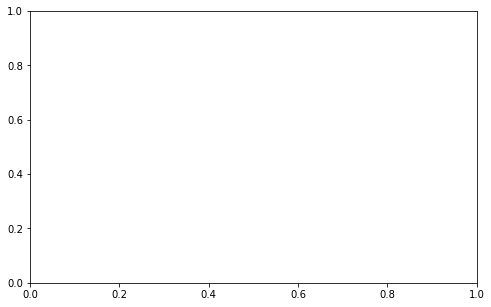

In [9]:
UE_idx   = [ij[0] for ij in UEs] #[1,2,3,4,5,6,8,17,18]
UE_names = [ij[1].strip("()?") for ij in UEs] #['Profession?', 'Permanent?', 'Site?', 'Climaction?','Stratégie?','Quel objectif?',
            #'Individuel ou collectif?','Calculateur?','Influence recherche?'].replace('(','').replace(')','')

print(UE_idx,UE_names)
#colors2 = ['red', 'blue']
#a       = np.random.random(4)
#cs      = cm.Set1(np.arange(4)/4.)

keys1 = ['Oui','Non']
keys2 = ['Tout à fait d\'accord','Plutôt d\'accord','Plutôt pas d\'accord','Pas du tout d\'accord']

# Changing key for specific question
Idx_change = [9]
tabword = ['cohérence','lien entre']
keys3 = ['Bonne','Plutôt bonne','Plutôt mauvaise','Mauvaise']

# Changing answers for specific question
UE_change  = ['LU2ST034','LU2ST303','LU2ST044','LU2ST402','LU3ST603','LU3ST602']
keys4 = ['Très clair','Assez clair','Assez flou','Très flou']

# Changing answers for S1
tabword2 = ['capsules']
keys5 = ['Oui, beaucoup (> 10 vidéos)','Oui, certaines (5-10 vidéos)',\
'Quelques unes (1-4 vidéos)','Non, mais je sais qu\'elles existaient',\
'Non, car je ne savais pas qu\'il y avait des capsules vidéos de soutien']
tabword3 = ['Ces vidéos']
keys6 = ['Oui, le plus souvent','Oui, certaines',\
         'Non, même si je les ai visionnées','Non, car pas visionnées']

# Changing answers for S6
tabword4 = ['Vous sentez-vous','lien existant entre disciplines']
keys7 = ['Oui','Pas d\'avis','Non']

#keys6 = ['Oui, beaucoup (> 10 vidéos)','Oui, certaines (5-10 vidéos)',\
#'Quelques unes (1-4 vidéos)','Non, mais je sais qu\'elles existaient',\
#'Non, car je ne savais pas qu\'il y avait des capsules vidéos de soutien']

print(tabword)
#c1 = '#1f77b4' #blue
#c2 = 'red' #green
#colors2 = [colorFader(c1,c2,x/2)for x in range(2)]
#colors4 = [colorFader(c1,c2,x/4)for x in range(4)]

# 12 questions !
Nb_questions = 10 #(UE_idx[1]-UE_idx[0])-1
if Semestre == 1:
    Nb_questions = 19
if Semestre == 6:
    Nb_questions = 13
print(Nb_questions)

figsize = (8, 5)

#UE_idx=[UE_idx[ij] for ij in range(len(UE_idx)) if UE_names[ij]=='LU2ST045']
#print(UE_idx)

for ij,idx in enumerate(UE_idx):
    UE = UE_names[ij]
    print('UE : ',UE)
    
    path_file = pathfig+UE+'/'
    print(path_file)
    _mkdir(path_file)
    
    for ik in range(Nb_questions):
      fig, ax = plt.subplots(1,figsize=figsize)

      data = df[questions[idx+ik]]
       
      #data = data.replace('’','\'')
      data = data.replace('Tout à fait d’accord','Tout à fait d\'accord')
      data = data.replace('Plutôt pas d’accord','Plutôt pas d\'accord')
      #data = data.replace('d’accord','d\'accord')
      data = data.replace('è','\'e')
      #data = data.replace('Très','Tr\'es')
      print(ik,data)
      data = data.value_counts() #normalize=True) 
                
      #colors = colors2 ; 
      changecolor = 0
      keys = keys1
      if ('Oui' in data.keys()):
        keys = keys1
      else:
        keys = keys2
        #if ik in Idx_change:
        if any([ii in questions[idx+ik] for ii in tabword]):
        #if 'cohérence' in questions[idx+ik]:
            keys = keys3
            if UE in UE_change:
                keys = keys4
        elif any([ii in questions[idx+ik] for ii in tabword2]):
            keys = keys5
        elif any([ii in questions[idx+ik] for ii in tabword3]):
            keys = keys6
      if any([ii in questions[idx+ik] for ii in tabword4]):
            keys = keys7
      print(UE,idx,keys,data.index)
    
      cmap = plt.cm.bwr
      colors = cmap(np.linspace(0., 0.95, len(keys)))
      #if changecolor:
      #    colors = colors_save 
  
          
    
      gcolors=dict()
      for ij,key in enumerate(keys):
        gcolors[key]=colors[ij]
      labels = [ij for ij in gcolors if ij in data.index]
      data   = data.reindex(labels)
      print(labels)
        
      wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data)\
                                            ,colors=[gcolors[i] for i in data.index]\
                                            ,textprops=dict(color="w") #, colors=color
                                            ,startangle=0)
    
      ax.legend(wedges, data.index,loc="best",bbox_to_anchor=(1, 1, 0.5, -0.5))
      plt.setp(autotexts, size=10, weight="bold")
    
      title = questions[idx+ik].split('.')[0]
      ax.set_title(title)
      print(title)
    
      name_file = 'Question_'+str(ik)
      name_file = path_file + name_file
      print(name_file)
      _savefig(fig,ax,title=title,name=name_file,xsize=figsize)


